<a href="https://colab.research.google.com/github/TaviTragus/data-science-fundamentals/blob/main/Unit2/TaviTragU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   PyMC model - visualization of posterior, make arrays of 1s and 0s for success and failures
*   Your explanation of the PyMC model

In [1]:
#installs to make everything work:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 851.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


# **Tavi Tragus Unit 2 Project: Citlaly Gutierrez College K%**
In this notebook, I will be ~~copying and pasting everything from Mr. Arredondo's Notes~~ answering the question "What will Citlaly Gutierrez's true strikeout percent (K%) be in college?"



###**Strikeouts**

Citlaly Gutierrez is a softball pitcher for UT Austin. Longhorn Softball is one of the best NCAA D1 softball team, second to the University of Oklahoma. Similar to Wembanyama, there was a plenty of hype when she commited to UT (https://bvmsports.com/2022/06/22/citlaly-gutierrez-brings-something-special-to-texas-softball/, https://www.youtube.com/watch?v=xcdoLvxKZ20, https://www.youtube.com/watch?v=gSpRZiPul3U). I am curious how much of an asset Citlaly has been and will be to UT. One way to measure the quality of a pitcher is how many batters they strike out. In softball, like baseball, the two teams trade being on offense and defense. They trade when the defending team has 3 outs on the offensive team. The pitcher can earn an out by getting three strikes on the batter before they get a hit or walked. Strikes are earned by balls that were thrown in the strike zone (an imaginary box that is over the plate plus the width of a ball on either side and from the batters knees to chest) or swings and misses. The first two strikes can also be earned by balls hit in foul territory. A strikout is the most direct thing a pitcher can do to put their team back on offense and in position to score. I will be finding the true percent of batters that Citlaly Gutierrez strikes out.

###**Prior**
To find our prior, I will assume that Gutierrez will be a slightly worse pitcher in college than she was in high school because batters in college are better than batters in highschool. I will find her prior by putting her whole highschool record into a beta distribution. Alpha will be the batters she struck out and beta will be the batters she didn't strike out. Looking at Maxpreps (the standard platform to find stats for almost all of the highschool sports), she faced 570 batters and struck out 314.


<Axes: >

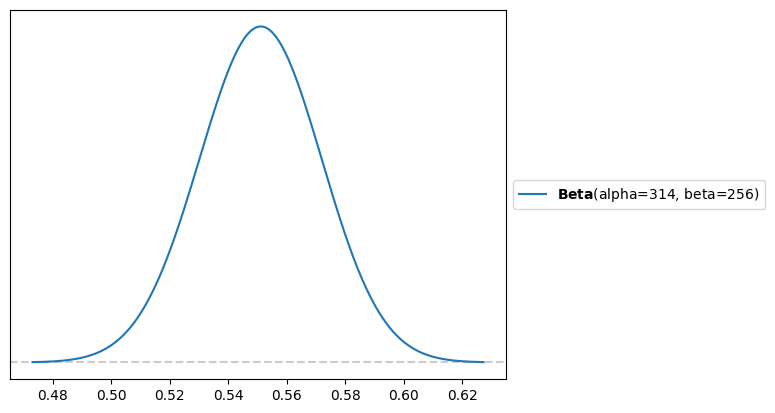

In [2]:
#finding an initial prior using just data from highschool
prior1 = pz.Beta(alpha=314, beta=256)

#graphing that prior beta distribution
prior1.plot_pdf()

Now, I am going to fiddle with the numbers so that the distribution is shows that her k% is likely to be 10 percentage points lower. I did this by dividing 314/570 (.550877), subtracting .1 (.450877), and multiplying by the 570 batters Gutierrez faced (257). With this new, constructed data (alpha=257, beta=313).

<Axes: >

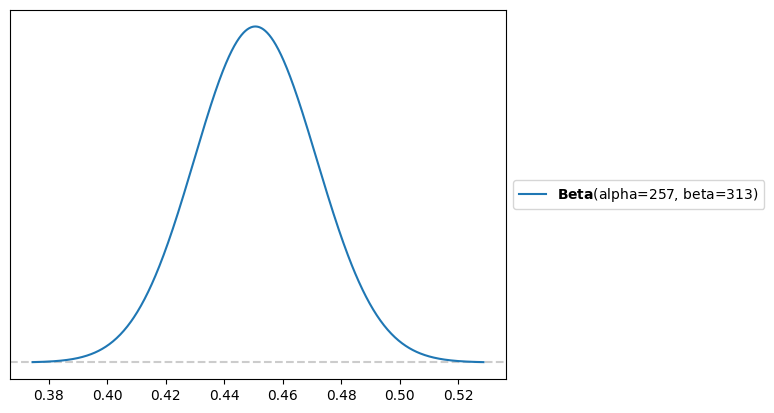

In [3]:
#finding an initial prior using just data from highschool
prior2 = pz.Beta(alpha=257, beta=313)

#graphing that prior beta distribution
prior2.plot_pdf()

Now I will find the mean, median, and modes of this distribution to find 3 expected k%s for Cutierrez's college carreer.

In [4]:
#finding the mean, median, and mode of the beta distribution, to use as Gutierrez's expected true k% in college
prior2mode = (prior2.alpha - 1)/(prior2.alpha + prior2.beta - 2)
prior2.mean(), prior2.median(), prior2mode

(0.45087719298245615, 0.4508196969880995, 0.4507042253521127)

###**Likelihood**
To find the likelihood and posterior, I first define variables for how many people Gutierrez struck out and faced.

In [5]:
#ks is how many people she struck out
ks = 139

#bf is how many batters she faced
bf = 845

#notks is how many batters she faced and didn't strike out
notks = bf-ks

#having colab write out the arrays for me so i can look at them.
ks, bf, notks

(139, 845, 706)

Next, I define my likelihood with a Binomial distribution.

<Axes: >

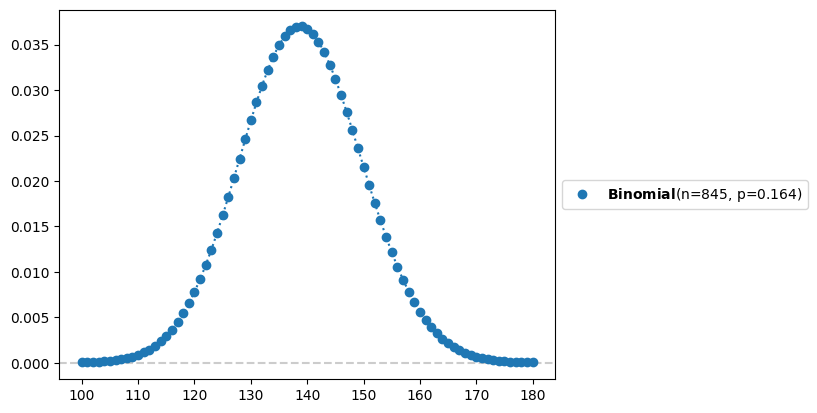

In [6]:
likely = pz.Binomial(n = bf, p = (ks/bf))
likely.plot_pdf()

### **Posterior**
Now I am doing what Mr. Arredondo did and making an analyticmodel by combining the data and a PyMC model with numpy arrays.

0.3201413427561837

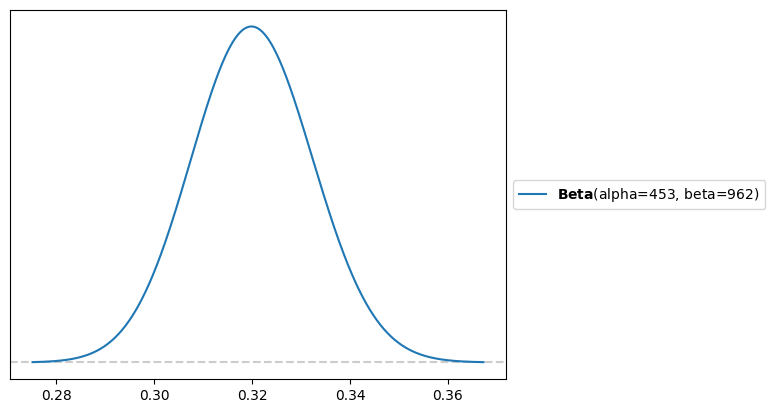

In [7]:
#analytic model
ks_old = 314
notks_old = 256

ks_new = 139
bf_new = 845

analytic_k = pz.Beta(alpha = ks_old + ks_new, beta = notks_old + bf_new - ks_new)
analytic_k.plot_pdf()
analytic_k.mean()

<Axes: title={'center': 'θ'}>

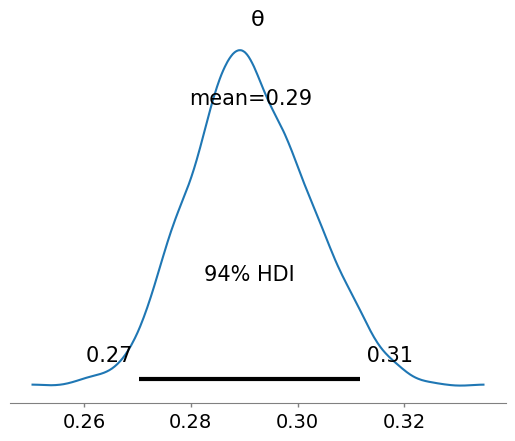

In [8]:
#PyMC Model:
ks = np.repeat(1, 139)
notks = np.repeat(0, 845)
k_data = np.concatenate([ks, notks])
with pm.Model() as Guti_k_model:
  θ = pm.Beta('θ', alpha = 314., beta = 256.)
  y = pm.Bernoulli('y', p = θ, observed = k_data)
  idata_k = pm.sample(1000)

az.plot_posterior(idata_k)

###**PyMC model comments**
I think its interesting how off my prediction was. Looking just at her college stats, she struck out between one fourth and one half as many batters as my prior indicated she would. I think I should also have used smaller numbers to get the same percentage estimate for my prior. I think the size of the fudged data I input was too large, so two years of college data didn't balance out my wrong-ness. If we just make a beta distribution of the data from college:

0.16449704142011834

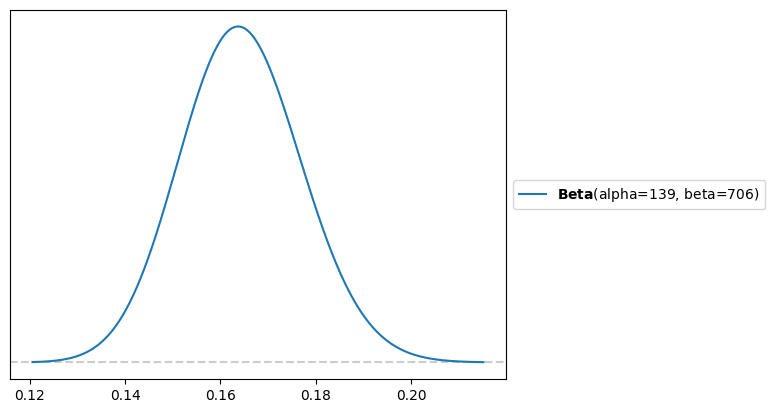

In [10]:
#beta distribution with college data, then the plot and the mean
collegefands = pz.Beta(alpha = 139, beta = 706)
collegefands.plot_pdf()
collegefands.mean()

we get an estimate that throughout her college career, Citlaly Gutierrez will strike out about 16% of batters she faces. Because my prior data is so large(is that the correct terminology?), my PyMC model predicts that she will strike out between 27% and 31% of batters.